# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Gabriel Dias             | RM 330587     | `1IA` |
| Guilherme Lahr           | RM 330351     | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos e, até mesmo, trechos de código-fonte.

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

O dataset oroginal "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.

**Atualizado em 16/07/2017**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
#IMPLEMENTAR
df_auto = pd.read_csv("data/automobile-mod.csv", sep=";")
df_auto.head(10)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

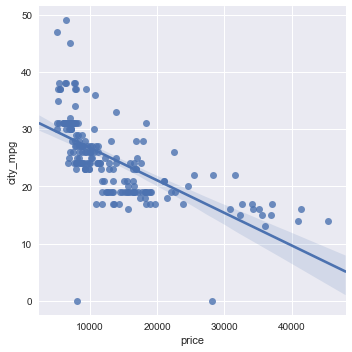

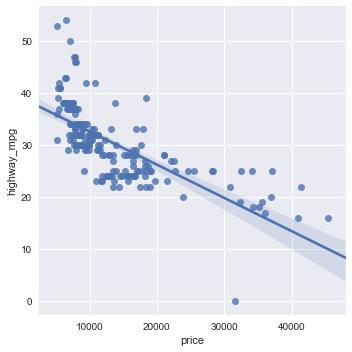

In [3]:
#IMPLEMENTAR
#consumo = city_mpg ou highway_mpg
#tamanho pode ser width, height ou lenght
#preço = price

plt.style.use('seaborn')

sns.lmplot("price", "city_mpg", df_auto)
sns.lmplot("price", "highway_mpg", df_auto)

**Comentários do grupo:** Percebe-se que quanto maior o valor do carro, menos milhas por galão o carro percorre. Acreditamos que carros mais caros tem motores potentes, justificando o maior consumo do combustível. Abaixo verificaremos a relação de preço x potência (HP).

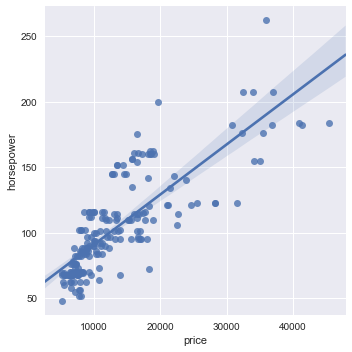

In [4]:
sns.lmplot("price", "horsepower", df_auto)

**Comentários do grupo:** conforme dito anteriormente, carros mais caros tendem a ser mais potentes. Para finalizar a 1a etapa vamos verificar a relação de tamanho com valor do carro.

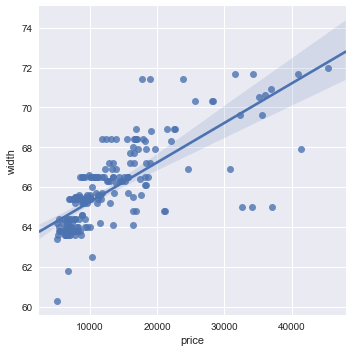

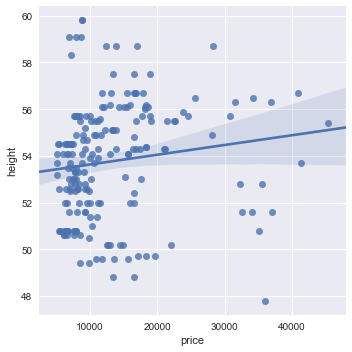

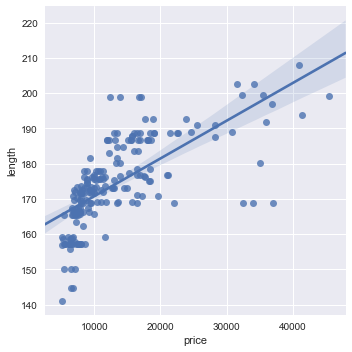

In [5]:
#width, height ou lenght
sns.lmplot("price", "width", df_auto) 
sns.lmplot("price", "height", df_auto) 
sns.lmplot("price", "length", df_auto) 

**Comentários do grupo:** com exceção da altura, que está bem distribuida, as variáveis comprimento e largura influenciam na variável preço.

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:** Vamos filtrar o df com os carros mais caros e depois com os mais baratos para avaliar as variáveis consumo e potência do carro. No primeiro podemos ver que temos 3 carros caros, potente mas que consome muito combustível; os carros baratos (abaixo de 10.000) por sua vez economizam no combustível mas são consideravelmente mais fracos.

In [6]:
#analisar carros caros
df_auto[df_auto["price"]>=40000]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
15,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,...,209,mpfi,3.62,3.39,8.0,182,5400.0,16.0,22.0,41315
70,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,...,308,mpfi,3.80,3.35,8.0,184,4500.0,14.0,16.0,40960
71,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,...,304,mpfi,3.80,3.35,8.0,184,4500.0,14.0,16.0,45400


Analisando os registros dos carros mais caros do dataset temos:

HP > 180; milhas por galao < 20 aproximadamente

In [7]:
df_auto[df_auto["price"]<=10000].head(10)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
17,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,61,2bbl,2.91,3.03,9.50,48,5100.0,47.0,53.0,5151
18,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.60,70,5400.0,38.0,43.0,6295
19,chevrolet,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,...,90,2bbl,3.03,3.11,9.60,70,5400.0,38.0,43.0,6575
20,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.41,68,5500.0,37.0,41.0,5572
21,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.40,68,5500.0,31.0,38.0,6377
22,dodge,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,...,98,mpfi,3.03,3.39,7.60,102,5500.0,24.0,30.0,7957
23,dodge,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.40,68,5500.0,31.0,38.0,6229
24,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.40,68,5500.0,31.0,38.0,6692
25,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,...,90,2bbl,2.97,3.23,9.40,68,5500.0,31.0,38.0,7609
26,dodge,gas,turbo,two,sedan,fwd,front,93.7,157.3,63.8,...,98,mpfi,3.03,3.39,7.60,102,5500.0,24.0,30.0,8558


Analisando os carros mais baratos do dataset temos: 
    
HP < 100; milhas por galao > 30

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

In [8]:
#IMPLEMENTAÇÃO
from sklearn import preprocessing

#colunas onde temos valores numéricos
cols_numericas = ["length",
"width",
"height",
"curb_weight",
"engine_size",
"bore",
"stroke",
"compression_ratio",
"horsepower",
"peak_rpm",
"city_mpg",
"highway_mpg",
"wheel_base",
"price"]

df_auto[cols_numericas].head(5)

,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,wheel_base,price
0,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21.0,27.0,88.6,13495
1,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000.0,21.0,27.0,88.6,16500
2,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000.0,19.0,26.0,94.5,16500
3,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500.0,24.0,30.0,99.8,13950
4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500.0,18.0,22.0,99.4,17450


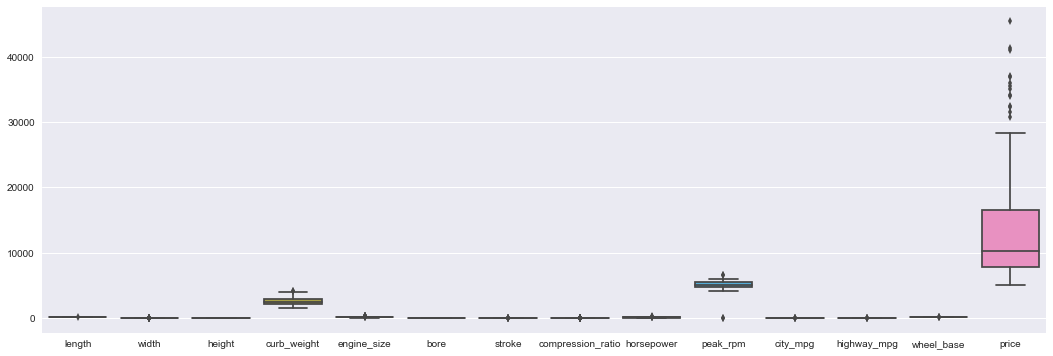

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(ax=ax,data=df_auto[cols_numericas]);
sns.despine()

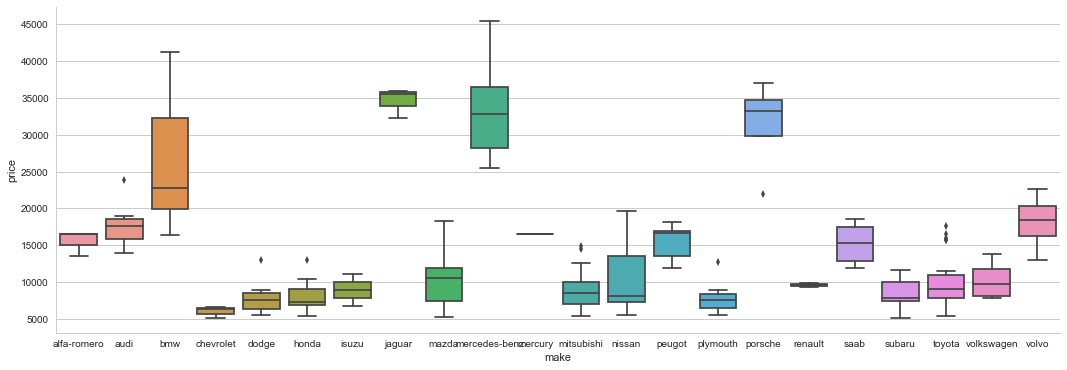

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(ax=ax,data=df_auto, x="make", y="price");
sns.despine()

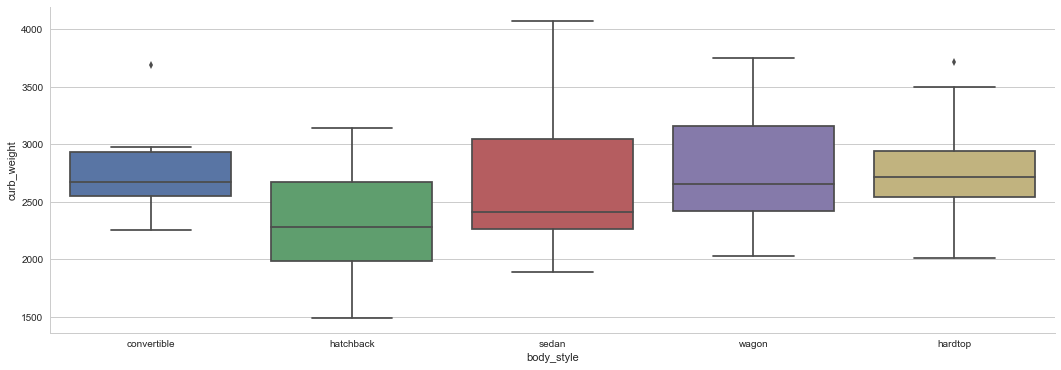

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(ax=ax,data=df_auto, x="body_style", y="curb_weight");
sns.despine()



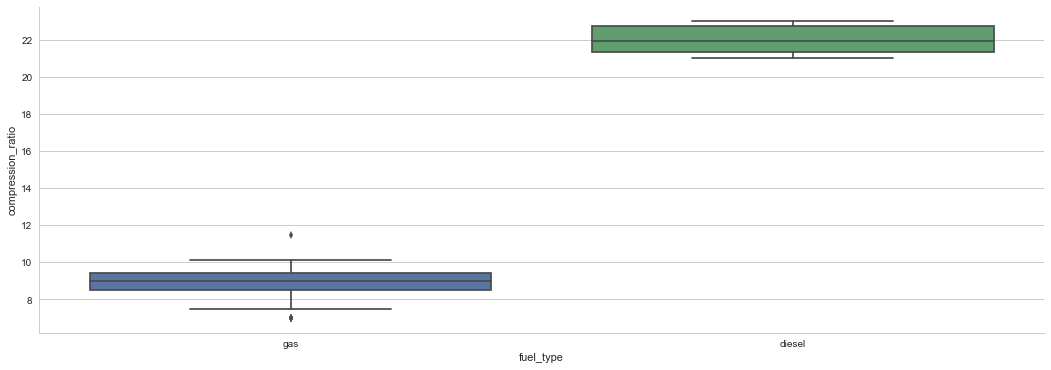

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(ax=ax,data=df_auto, x="fuel_type", y="compression_ratio");
sns.despine()

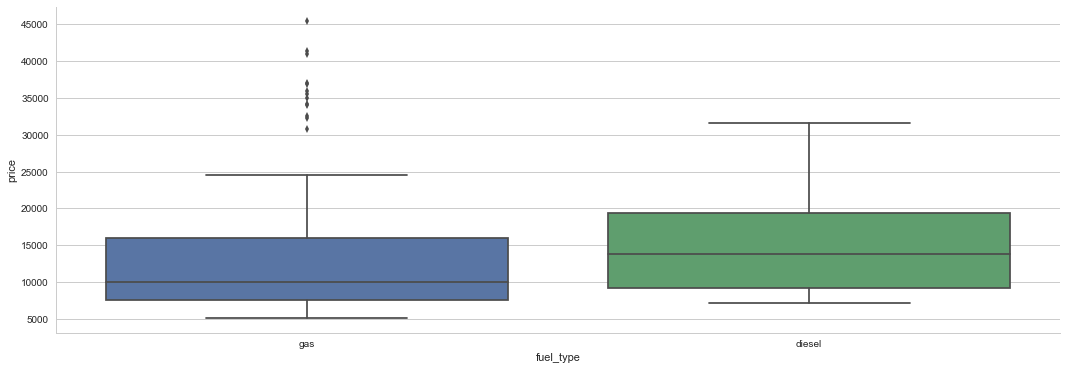

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(ax=ax,data=df_auto, x="fuel_type", y="price");
sns.despine()

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [14]:
#IMPLEMENTAÇÃO
df_auto.isnull().any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

In [15]:
#IMPLEMENTAÇÃO
#preencher com media da coluna, ja que nao sao dados parametricos

#verifica as linhas que estao nulas por coluna
#df_auto[df_auto['peak_rpm'].isnull() == True]
#df_auto[df_auto['city_mpg'].isnull() == True]
#df_auto[df_auto['highway_mpg'].isnull() == True]

df_auto['peak_rpm'] = df_auto['peak_rpm'].replace(np.nan, df_auto['peak_rpm'].mean())
df_auto['city_mpg'] = df_auto['city_mpg'].replace(np.nan, df_auto['city_mpg'].mean())
df_auto['highway_mpg'] = df_auto['highway_mpg'].replace(np.nan, df_auto['highway_mpg'].mean())

In [16]:
#NOVO
df_auto[["peak_rpm","city_mpg", "highway_mpg"]].isnull().any()

peak_rpm       False
city_mpg       False
highway_mpg    False
dtype: bool

In [17]:
df_auto[["peak_rpm","city_mpg", "highway_mpg"]].mean()

peak_rpm       5062.81407
city_mpg         24.92500
highway_mpg      30.54500
dtype: float64

### Análise de valores com valores iguais a 0

Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [18]:
#IMPLEMENTAÇÃO
#NOVO
(df_auto  == 0).any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

In [19]:
#IMPLEMENTAÇÃO
df_auto['peak_rpm'] = df_auto['peak_rpm'].replace(0, df_auto['peak_rpm'].mean())
df_auto['city_mpg'] = df_auto['city_mpg'].replace(0, df_auto['city_mpg'].mean())
df_auto['highway_mpg'] = df_auto['highway_mpg'].replace(0, df_auto['highway_mpg'].mean())

In [20]:
#agora e possivel normalizar
#normalizar os dados de 0 a 1
x = df_auto[cols_numericas].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_auto_norm = pd.DataFrame(x_scaled)

df_auto_norm.columns = cols_numericas

df_auto_norm.head(5)

,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,wheel_base,price
0,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.058309,0.207959
1,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.058309,0.282558
2,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.230321,0.282558
3,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.384840,0.219254
4,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.373178,0.306142


### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [21]:
def identificacao_outlier(df, column_name): 
    print(column_name)
    
    #IMPLEMENTAÇÃO
    q1 = np.percentile(df[column_name],25)
    q3 = np.percentile(df[column_name],75)
    
    print("q1: %d e q3: %d" %(q1 ,q3))
    
    iqr = q3-q1
    
    print("iqr: %d" %iqr)
    
    iqr = iqr * 1.5 
    
    print("iqr * passos: %d" %iqr)
    
    q1 = q1 - iqr
    q3 = q3 + iqr
    
    
    outlier_upper = []
    outlier_lower = []
    
    print("q1: %d e q3: %d" %(q1 ,q3))
    
    for i in df[column_name]:
        if(i<q1):
            outlier_lower.append(i)
        elif(i>q3):
            outlier_upper.append(i)
        
    
    print(outlier_upper + outlier_lower)
    print(" ")

In [22]:
for col in cols_numericas:
    identificacao_outlier(df_auto, col)
#cols_numericas

length
q1: 166 e q3: 183
iqr: 16
iqr * passos: 25
q1: 141 e q3: 208
[141.1]
 
width
q1: 64 e q3: 66
iqr: 2
iqr * passos: 3
q1: 60 e q3: 70
[71.4, 71.4, 71.4, 70.9, 70.6, 71.7, 71.7, 70.5, 71.7, 72.0, 60.3]
 
height
q1: 52 e q3: 55
iqr: 3
iqr * passos: 5
q1: 46 e q3: 60
[]
 
curb_weight
q1: 2169 e q3: 2926
iqr: 757
iqr * passos: 1135
q1: 1033 e q3: 4061
[4066, 4066]
 
engine_size
q1: 98 e q3: 141
iqr: 43
iqr * passos: 64
q1: 33 e q3: 205
[209, 209, 209, 258, 258, 326, 234, 234, 308, 304]
 
bore
q1: 3 e q3: 3
iqr: 0
iqr * passos: 0
q1: 2 e q3: 4
[]
 
stroke
q1: 3 e q3: 3
iqr: 0
iqr * passos: 0
q1: 2 e q3: 3
[4.17, 4.17, 2.19, 2.19, 2.07, 2.36]
 
compression_ratio
q1: 8 e q3: 9
iqr: 0
iqr * passos: 1
q1: 7 e q3: 10
[11.5, 22.7, 22.0, 21.5, 21.5, 21.5, 21.5, 21.9, 21.0, 21.0, 21.0, 21.0, 21.0, 22.5, 22.5, 22.5, 23.0, 23.0, 23.0, 23.0, 23.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
 
horsepower
q1: 70 e q3: 116
iqr: 46
iqr * passos: 69
q1: 1 e q3: 185
[262, 200, 207, 207, 207]
 
peak_rpm
q1: 4800 e q3

**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:** O pico de RPM possui 2 dados que fogem bastante da regra (para baixo). Possivelmente foi um erro de digitacao. Sera arredondado na casa de milhar. A um primeiro momento, podemos ver que a taxa de compressão (compression_ratio) tem alguns outliers. Verificando o bloxplot com a comparação entre tipo de combusível x taxa de compressão, notamos que motores a diesel possuem uma taxa bem maior comparado a motores a gasolina. Os dados serão mantidos.


In [23]:
df_auto[df_auto["peak_rpm"]<3000]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [24]:
df_auto[(df_auto["horsepower"] > 73) & df_auto["horsepower"] < 100].head(20)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


In [25]:
df_auto["peak_rpm"] = df_auto["peak_rpm"].replace(30.545,3055.0)
df_auto[df_auto["peak_rpm"]<3000]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [26]:
#IMPLEMENTAÇÃO

def mapear_serie(serie):
    dict_gen = {}
    
    #IMPLEMENTAÇÃO
    serie_aux = []
    serie_aux = serie.unique()
  
    i = 0
    
    for n in serie_aux:
        dict_gen[n] = i
        i = i+1
        
    #print(type(dict_gen))
    
    return dict_gen

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [27]:
# IMPLEMENTAÇÃO 
cols_param = ["make",
"fuel_type",
"aspiration",
"number_of_doors",
"body_style",
"drive_wheels",
"engine_location",
"engine_type",
"number_of_cylinders",
"fuel_system"
]

df_auto_param = df_auto.copy()
df_auto_param.head(5)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450


Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [28]:
#IMPLEMENTAÇÃO
dict_aux = {}

for col in cols_param:
    #print(col)
    dict_aux = mapear_serie(df_auto_param[col])
    #print(dict_aux)
    df_auto_param[col].replace(dict_aux, inplace=True)

df_auto_param.head(20)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,0,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,0,0,0,0,1,0,0,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,1,0,0,1,2,1,0,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,1,0,0,1,2,2,0,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,1,0,0,0,2,1,0,99.8,177.3,66.3,...,136,0,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,1,0,0,1,2,1,0,105.8,192.7,71.4,...,136,0,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,1,0,0,1,3,1,0,105.8,192.7,71.4,...,136,0,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,1,0,1,1,2,1,0,105.8,192.7,71.4,...,131,0,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,2,0,0,0,2,0,0,101.2,176.8,64.8,...,108,0,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:**

**Regressão linear:** Regressão Linear é um algoritmo de aprendizado de máquina supervisionado em que a saída prevista é contínua. É usado para prever valores dentro de um intervalo contínuo (vendas, preço) em vez de tentar classificá-los em categorias (gato, cachorro).

**Árvore de Decisão:** É um modelo estatístico que através de um treinamento supervisionado, pode classificar ou prever dados. A árvore inicia com um nó raiz e finaliza em um nó folha. A estrutura de uma árvore de decisão se assemelha a um fluxograma, onde o caminho percorrido até o nó folha, passa por uma séria de decisões baseadas em SE-SENÃO.

**Regressão Ridge:** A Ridge Regression é um método de regularização do modelo que tem como principal objetivo suavizar atributos que sejam relacionados uns aos outros e que aumentam o ruído no modelo (multicolinearidade). Com isso com a retirada de determinados atributos do modelo, o mesmo converge para um resultado muito mais estável em que com a redução desses atributos, a redução em termos de acurácia do modelo se mantêm inalterada. O mecanismo algoritmico que faz isso é através de um mecanismo de penalização que coloca um viés e que vai reduzindo os valores os betas até não zero. Com isso, os atributos que contribuem menos para o poder preditivo do modelo são levados para a irrelevância usando esse mecanismo de penalização do viés.

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e qual seria o atributo preditor?

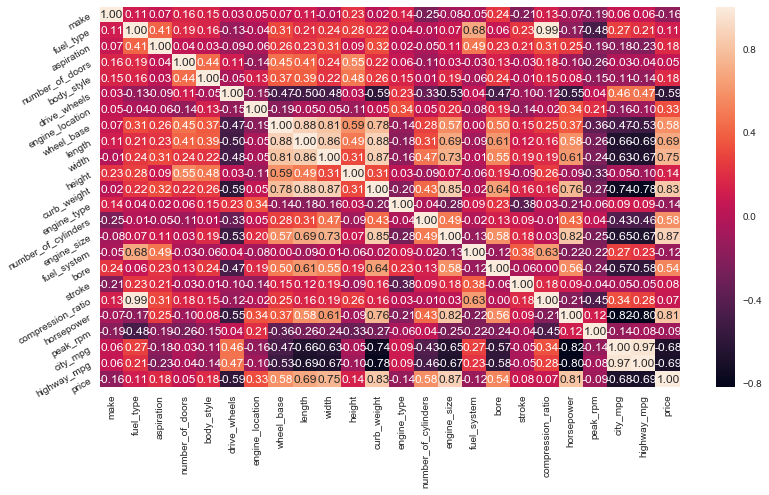

In [29]:
#IMPLEMENTAÇÃO
#Primeiros vamos verificar a correlação entre as variáveis
corr = df_auto_param.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [30]:
#IMPLEMENTAÇÃO
atrib_usados = ["fuel_type",
                "body_style",
                "aspiration",
                "wheel_base",
                "engine_location",
                "length", 
                "width",  
                #"fuel_system",
                "number_of_cylinders",
                #"engine_size", 
                "bore", 
                #"stroke",
                "horsepower"
                #"peak_rpm"
               ]

x = df_auto_param[atrib_usados]
y = df_auto_param["price"]

Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [31]:
from sklearn.model_selection import train_test_split

#IMPLEMENTAÇÃO
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.30, random_state=20)
        

Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [32]:
#IMPLEMENTAÇÃO
#Inspeção de X_train
x_train.head(5)

,fuel_type,body_style,aspiration,wheel_base,engine_location,length,width,number_of_cylinders,bore,horsepower
112,0,2,0,107.9,0,186.7,68.4,0,3.46,97
159,0,2,0,94.5,0,168.7,64.0,0,3.19,70
85,0,2,0,96.3,0,172.4,65.4,0,3.17,116
116,0,1,1,93.7,0,157.3,63.8,0,3.03,102
45,0,2,0,113.0,0,199.6,69.6,1,3.63,176


In [33]:
#IMPLEMENTAÇÃO
#Inspeção de Y_train
y.head(5)

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [34]:
#IMPLEMENTAÇÃO
print("Treino:\n",x_train.count()/df_auto_param[atrib_usados].count())
print("Teste:\n",x_test.count()/df_auto_param[atrib_usados].count())

Treino:
 fuel_type              0.696517
body_style             0.696517
aspiration             0.696517
wheel_base             0.696517
engine_location        0.696517
length                 0.696517
width                  0.696517
number_of_cylinders    0.696517
bore                   0.696517
horsepower             0.696517
dtype: float64
Teste:
 fuel_type              0.303483
body_style             0.303483
aspiration             0.303483
wheel_base             0.303483
engine_location        0.303483
length                 0.303483
width                  0.303483
number_of_cylinders    0.303483
bore                   0.303483
horsepower             0.303483
dtype: float64


## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [36]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()

#IMPLEMENTAÇÃO
lr_model.fit(x_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [37]:
#IMPLEMENTAÇÃO
pontuacao(lr_model, x_train, y_train.ravel())
pontuacao(lr_model, x_test, y_test.ravel())


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) R2 score: 0.87
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) R2 score: 0.78


### Regressão de árvore de Decisão

In [38]:
from sklearn import tree

dtr_model = tree.DecisionTreeRegressor(random_state=20)

#IMPLEMENTAÇÃO

dtr_model.fit(x_train, y_train.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=20, splitter='best')

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [39]:
#IMPLEMENTAÇÃO
pontuacao(dtr_model, x_train, y_train.ravel())
pontuacao(dtr_model, x_test, y_test.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=20, splitter='best') R2 score: 1.00
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=20, splitter='best') R2 score: 0.85


### Regressão Ridge

In [40]:
lrr_model = linear_model.Ridge(random_state=20)

#IMPLEMENTAÇÃO

lrr_model.fit(x_train, y_train.ravel())

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=20, solver='auto', tol=0.001)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [41]:
#IMPLEMENTAÇÃO
pontuacao(lrr_model, x_train, y_train.ravel())
pontuacao(lrr_model, x_test, y_test.ravel())

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=20, solver='auto', tol=0.001) R2 score: 0.87
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=20, solver='auto', tol=0.001) R2 score: 0.76


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:** O algoritmo de árvore de decisão foi melhor. Uma taxa de 99% na base de treino e 83% na base de teste. Apesar de a taxa de acertos na base de treino ser relativamente boa, acreditamos que o algoritmo esteja "overfitando".

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [42]:
from sklearn.model_selection import GridSearchCV
        
parameters = {"fit_intercept":[True, False],"copy_X":[True, False],"normalize":[True,False]}
opt_model_lr = GridSearchCV(lr_model, parameters, cv=5, scoring='r2')
opt_model_lr.fit(x_train, y_train.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'copy_X': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Calcule as pontuações para o melhor estimador com dados de treino.

In [43]:
opt_model_lr.score(x_train, y_train.ravel()), opt_model_lr.best_estimator_

(0.8682381162609997,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

E também para os dados de testes.

In [44]:
opt_model_lr.score(x_test, y_test.ravel()), opt_model_lr.best_estimator_

(0.7764320716636167,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

### Regulação do Modelo de Regressão de Árvore de Decisão

In [77]:
parameters = {'max_depth':np.arange(1,10,1),'max_features': np.arange(1, 10, 1),'random_state':[20]}
opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2', cv=5)
opt_model_dtr.fit(x_train, y_train.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'random_state': [20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [78]:
#IMPLEMENTAÇÃO
opt_model_dtr.score(x_train, y_train.ravel()), opt_model_dtr.best_estimator_


(0.9953763537194563,
 DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=7,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=20, splitter='best'))

Pontuação dos dados de teste.

In [79]:
# IMPLEMENTAÇÃO
opt_model_dtr.score(x_test, y_test.ravel()), opt_model_dtr.best_estimator_


(0.8205149868554512,
 DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=7,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=20, splitter='best'))

### Regulação do Modelo de Regressão Ridge

In [63]:
parameters = {'alpha':[0.1, 1.0, 10.0],'fit_intercept':[True,False], 'random_state':[20]}

opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(x_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=20, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 1.0, 10.0], 'fit_intercept': [True, False], 'random_state': [20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [64]:
#IMPLEMENTAÇÃO
opt_model_lrr.score(x_train, y_train.ravel()), opt_model_lrr.best_estimator_


(0.8656335023380993,
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=20, solver='auto', tol=0.001))

Pontuação dos dados de teste.

In [65]:
#IMPLEMENTAÇÃO
opt_model_lrr.score(x_test, y_test.ravel()), opt_model_lrr.best_estimator_


(0.7585345912312438,
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=20, solver='auto', tol=0.001))

Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|                     | Regressão linear | Regressão árvore de decisão | Regressão ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| R2 treino           |      86,82%       |      99,53%                  |   86,56%         |
| R2 teste            |      77,64%       |      82,05%                  |   75,85%         |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:** O algoritmo de regressão de árvore de decisão obteve um melhor desemenho entre os três, porém, novamente deve estar ocorrendo overfitting além de a otimização ter piorado a taxa de acertos na base de teste.

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [91]:
#IMPLEMENTAÇÃO
from sklearn import tree

best_model_dtr = tree.DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=7,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=20, splitter='best')

best_model_dtr.fit(x_train, y_train.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=7,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=20, splitter='best')

### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [86]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names
feature_col_names = atrib_usados
feature_col_names

['fuel_type',
 'body_style',
 'aspiration',
 'wheel_base',
 'engine_location',
 'length',
 'width',
 'number_of_cylinders',
 'bore',
 'horsepower']

In [90]:
#IMPLEMENTAÇÃO
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
#matriz dentro de outra matriz [[a,b,c,d,e]]

test_example_1 = [[0,2,0,93.1,0,156.1,62,0,2.80,66]]
test_example_2 = [[0,2,0,99.8,0,176.3,67,2,3.4,109]]
test_example_3 = [[0,2,0,121,0,205,69,3,7,190]]

predicao1 = opt_model_dtr.predict(test_example_1)[0]
predicao2 = opt_model_dtr.predict(test_example_2)[0]
predicao3 = opt_model_dtr.predict(test_example_3)[0]

print("Predição 1: {0} - valor esperado entre 6500 a 7500".format(predicao1))
print("Predição 2: {0} - valor esperado entre 15500 a 16500".format(predicao2))
print("Predição 3: {0} - valor esperado acima dos 40000".format(predicao3))


Predição 1: 7150.5 - valor esperado entre 6500 a 7500
Predição 2: 17450.0 - valor esperado entre 15500 a 16500
Predição 3: 36880.0 - valor esperado acima dos 40000


## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:** As predições 1 e 2 estão dentro de esperado, porém a pedrição 3, o algoritmo errou. O ideal seria mais dados para treinar o modelo.

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina?

**Resposta**: Poderiamos utilizar os algoritmos de regressão em qualquer área onde queira predizer um valor. Exemplo, de acordo com as caracteristicas do motor do carro, predizer a velocidade de alcance. Poderiamos predizer vendas, quantidade de chuva, etc.